In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import math
# Метод простых итераций,метод Зейделя, метод Ньютона

In [2]:

x_sym = sp.symbols("x")
y_sym = sp.symbols("y")
f1_sym = sp.tan(x_sym*y_sym+0.4) - x_sym**2
f2_sym =0.8*x_sym ** 2 + 2*y_sym ** 2 - 1

In [3]:
sp.solve(f2_sym, y_sym)
f2_sym

0.8*x**2 + 2*y**2 - 1

In [4]:
df1dx = sp.diff(f1_sym, x_sym)
df1dy = sp.diff(f1_sym, y_sym)
df2dx = sp.diff(f2_sym, x_sym)
df2dy = sp.diff(f2_sym, y_sym)

In [5]:
def f1y(x):
    return (np.arctan(x**2)-0.4)/x

def f2y(x):
    return np.sqrt(((1-0.8*(x**2))/2))

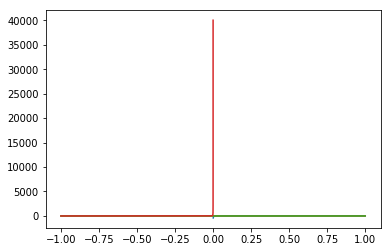

In [91]:
# НЕ РАБОТАЕТ
xp = np.arange(0.001, 1, 0.00001)
y1 = f1y(xp)

xn = np.arange(-1, 0, 0.00001)
y1n = f1y(xn)

xx = np.arange(-1.0, 1, 0.001)
y2 = f2y(xx)

plt.plot(xp, y1, xx, y2, xx, -y2, xn, y1n)
plt.show()



In [6]:
# метод итераций
def iter_(f, f0, x, eps):
    iterations = 0
    while np.linalg.norm(x - f(x)) >= eps:
        iterations += 1
        x = f(x)
    return {'x': x, 'y': f0(x), 'iterations': iterations}

In [7]:
# метод Зейделя
def seidel(f, f0, x, eps):
    iterations = 0
    n = len(x)
    while np.linalg.norm(x - f(x)) >= eps:
        iterations += 1
        for i in range(n):
            x[i] = f(x)[i]
    return {'x': x, 'y': f0(x), 'iterations': iterations}

In [19]:
# якобианы
def jacob(x):
    return np.array([
        [float(df1dx.subs(x_sym, x[0]).subs(y_sym, x[1]).evalf()),
        float(df1dy.subs(x_sym, x[0]).subs(y_sym, x[1]).evalf())],
        [float(df2dx.subs(x_sym, x[0]).subs(y_sym, x[1]).evalf()),
        float(df2dy.subs(x_sym, x[0]).subs(y_sym, x[1]).evalf())]])

# метод Ньютона
def newton(f, jacobian, x, eps):
    iterations = 0
    xnext = f(x)
    while np.linalg.norm(x - xnext) >= eps:
        iterations += 1
        x = xnext
        w_inv = np.linalg.inv(jacobian(x))
        xnext = x - w_inv.dot(f(x))
    return {'x':xnext, 'y':f(x), 'iterations':iterations}

In [9]:
def F1x(x):
    return np.sqrt(np.abs(np.tan(x[0]*x[1]+0.4)))

def F2y(x):
    return np.sqrt(abs((1-0.8*(x[0]**2))/2))

def FxFy(x):
    return np.array([F1x(x), F2y(x)])


def f1(x):
    return math.tan(x[0]*x[1]+0.4) - x[0]**2

def f2(x):
    return 0.8* (x[0] ** 2) + 2* (x[1] ** 2) - 1 

def fn(x):
    return np.array([f1(x), f2(x)])


In [45]:
iter_(FxFy, fn, np.array([6.0, 1.0]), 0.00001)

{'x': array([0.96194604, 0.36036317]),
 'y': array([ 1.82026022e-05, -4.61984805e-06]),
 'iterations': 6454}

In [34]:
for i in range(-10, 10):
    for j in range(-10, 10):
        print(i, j)
        print(iter_(FxFy, fn, np.array([i, j]), 0.01)['iterations'])
        print('\n')

-10 -10
8621


-10 -9
18713


-10 -8
395


-10 -7
39562


-10 -6
11470


-10 -5
697


-10 -4
589


-10 -3
4346


-10 -2
22217


-10 -1
54185


-10 0
14780


-10 1
579


-10 2
21011


-10 3
17444


-10 4
5724


-10 5
3550


-10 6
32554


-10 7
35346


-10 8
7370


-10 9
3293


-9 -10
653


-9 -9
5023


-9 -8
4109


-9 -7
20866


-9 -6
2049


-9 -5
9957


-9 -4
16669


-9 -3
29168


-9 -2
3139


-9 -1
6776


-9 0
6203


-9 1
28158


-9 2
543


-9 3
5094


-9 4
669


-9 5
2236


-9 6
5470


-9 7
33518


-9 8
20556


-9 9
542


-8 -10
48992


-8 -9
18650


-8 -8
4484


-8 -7
945


-8 -6
21293


-8 -5
10372


-8 -4
25468


-8 -3
7804


-8 -2
25436


-8 -1
7895


-8 0
2882


-8 1
5689


-8 2
311


-8 3
5795


-8 4
18523


-8 5
4247


-8 6
5607


-8 7
17930


-8 8
6003


-8 9
14576


-7 -10
5447


-7 -9
16181


-7 -8
3736


-7 -7
12342


-7 -6
3452


-7 -5
15400


-7 -4
18696


-7 -3
6092


-7 -2
11943


-7 -1
10160


-7 0
624


-7 1
1276


-7 2
8215


-7 3
1363


-7 4
48839


-7 5
717


-7 6

In [46]:
seidel(FxFy, fn, np.array([6.0, 1.0]), 0.00001)

{'x': array([0.96194922, 0.36036298]),
 'y': array([1.38778327e-05, 0.00000000e+00]),
 'iterations': 24}

In [47]:
newton(fn, jacob, np.array([6.0, 1.0]), 0.00001)

{'x': array([0.96195361, 0.36035829]),
 'y': array([-4.23432600e-09,  2.70060729e-09]),
 'iterations': 20}

In [41]:
import scipy.optimize

scipy.optimize.root(fn,  np.array([6.0, 1.0])).get('x')

array([0.96195361, 0.36035829])

In [44]:
etalon = scipy.optimize.root(fn, np.array([6.0, 1.0])).get('x')
print('Etalon - ', etalon, '\n')
print('REPORT:\n')
for eps in [0.0001, 0.00001, 0.000001, 0.0000001]:
    newt = newton(fn, jacob, np.array([6.0, 1.0]), eps)
    seid = seidel(FxFy, fn, np.array([6.0, 1.0]), eps)
    it = iter_(FxFy, fn, np.array([6.0, 1.0]), eps)
    print('Eps = ' + str(eps))
    print('-------------------')
    print('Newton - ', newt['x'], 'Error - ', etalon-newt['x'], 'Iterations - ', newt['iterations'])
    print('Seidel - ', seid['x'],'Error - ', etalon-seid['x'],'Iterations - ', seid['iterations'])
    print('Iter - ', it['x'],'Error - ', etalon-it['x'],'Iterations - ', it['iterations'])
    print('\n')

Etalon -  [0.96195361 0.36035829] 

REPORT:

Eps = 0.0001
-------------------
Newton -  [0.96195361 0.36035829] Error -  [-2.40138953e-09  6.85014490e-10] Iterations -  19
Seidel -  [0.96189526 0.36042059] Error -  [ 5.83527673e-05 -6.23003350e-05] Iterations -  11
Iter -  [0.96187403 0.36039784] Error -  [ 7.95843001e-05 -3.95454273e-05] Iterations -  9455


Eps = 1e-05
-------------------
Newton -  [0.96195361 0.36035829] Error -  [-3.96027655e-12 -1.34264821e-12] Iterations -  20
Seidel -  [0.96194947 0.36036271] Error -  [ 4.13709938e-06 -4.41745876e-06] Iterations -  17
Iter -  [0.96196187 0.36035565] Error -  [-8.26366350e-06  2.64449462e-06] Iterations -  9966


Eps = 1e-06
-------------------
Newton -  [0.96195361 0.36035829] Error -  [-3.96027655e-12 -1.34264821e-12] Iterations -  20
Seidel -  [0.96195407 0.36035781] Error -  [-4.55977174e-07  4.86875732e-07] Iterations -  22
Iter -  [0.96195438 0.36035789] Error -  [-7.72656317e-07  4.03364373e-07] Iterations -  10484


Eps =